In [2]:
import datetime
import backtrader as bt
import backtrader.analyzers as btanalyzers
import matplotlib.pyplot as plt

from backtrader_plotting import Bokeh
%load_ext nb_black

Loading BokehJS ...

<IPython.core.display.Javascript object>

In [25]:
names = ["VUSA", "A35", "S59", "VUSD", "BAB", "IWDA", "Z74", "ES3", "VWRD", "BTC"]

# Default
# Total 164612.68000000002
# Sharpe 1.0570090477526866
# Max drawdown 0.00600768169274357
# Money down 12795.879999999976

weights = [
    0.170605,
    0.065023,
    0.004958,
    0.027937,
    0.357180,
    0.281188,
    0.013112,
    0.036002,
    0.043996,
    0,
]

# Pure optimizer
# Total 159364.57
# Sharpe 0.7519011009533647
# Max drawdown 11.551793941033772
# Money down 18477.940000000002

# weights = [
#     0.1685908,
#     0.16565275,
#     0.0,
#     0.0,
#     0.50039283,
#     0.04323066,
#     0.01559638,
#     0.09344825,
#     0.0,
#     0.01308833,
# ]

# Time series Xfold
# Total 161000.56
# Sharpe 0.7602506658813541
# Max drawdown 13.030832573730773
# Money down 21058.95000000004

# weights = [
#     0.26395945432041895,
#     0.10671889160197104,
#     0.023961575778957057,
#     0.003100585383087023,
#     0.4436471924551789,
#     0.0344150765548231,
#     0.04961289541940282,
#     0.06653844069011368,
#     3.564673529765709e-13,
#     0.008045887800682097,
# ]

# Time series without BTC
# weights = [
#     0.27313647525475526,
#     0.10411962949647757,
#     0.023301092502984587,
#     0.003567243269516992,
#     0.45090198663425385,
#     0.03909438178591511,
#     0.05174074967548845,
#     0.05413844138063697,
#     1.3726664322886128e-13,
#     0,
# ]

weights = [
    0.27313647525475526,
    0.10411962949647757,
    0.023301092502984587,
    0.003567243269516992,
    0.45090198663425385,
    0.03909438178591511,
    0.05174074967548845,
    0.05413844138063697,
    1.3726664322886128e-13,
    0,
]


assets = list(map(lambda x: {"name": x, "data": f"data/{x}.csv"}, names))

# assets = [
#     {"name": "BAB", "data": "data/BAB.csv"},
#     {"name": "A35", "data": "data/A35.csv"},
# ]
# weights = [0.5, 0.5]

startDate = datetime.date.fromisoformat("2013-06-05")
endDate = datetime.date.fromisoformat("2019-06-13")

<IPython.core.display.Javascript object>

In [26]:
class TestStrategy(bt.Strategy):
    lastRebalanced = None
    params = (("rebalance", True), ("rebalancePeriod", 30))

    def rebalance(self):
        self.lastRebalanced = self.datetime.date()
        for i in range(len(weights)):
            self.order_target_percent(data=assets[i]["name"], target=weights[i])

    def next(self):
        if self.lastRebalanced == None:
            self.rebalance()
        elif (
            self.datetime.date() - self.lastRebalanced
        ).days > self.params.rebalancePeriod and self.params.rebalance:
            self.rebalance()

<IPython.core.display.Javascript object>

In [27]:
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000)
cerebro.addstrategy(TestStrategy, rebalance=True)
cerebro.addobserver(bt.observers.DrawDown)
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name="sharpe")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.TimeDrawDown, _name="timedrawdown")
cerebro.addanalyzer(btanalyzers.PeriodStats, _name="periodstats")

print(f"Starting Portfolio Value: {cerebro.broker.getvalue()}")

for i in range(len(assets)):
    data = bt.feeds.YahooFinanceCSVData(
        dataname=assets[i]["data"], reverse=False, fromdate=startDate, todate=endDate
    )
    cerebro.adddata(data, name=assets[i]["name"])

results = cerebro.run()

print(f"Final Portfolio Value: {cerebro.broker.getvalue()}")

print("Sharpe Ratio:", results[0].analyzers.sharpe.get_analysis())
print("Drawdown:", results[0].analyzers.drawdown.get_analysis())
print("Time Drawdown:", results[0].analyzers.timedrawdown.get_analysis())
print("Period Stats:", results[0].analyzers.periodstats.get_analysis())

Starting Portfolio Value: 100000
Final Portfolio Value: 148536.97999999998
Sharpe Ratio: OrderedDict([('sharperatio', 0.8460830034772615)])
Drawdown: AutoOrderedDict([('len', 0), ('drawdown', 0.0), ('moneydown', 0.0), ('max', AutoOrderedDict([('len', 407), ('drawdown', 8.276616237545532), ('moneydown', 10258.499999999985)]))])
Time Drawdown: OrderedDict([('maxdrawdown', 8.276616237545532), ('maxdrawdownperiod', 406)])
Period Stats: OrderedDict([('average', 0.05975971549590326), ('stddev', 0.05881186041014774), ('positive', 5), ('negative', 2), ('nochange', 0), ('best', 0.16860511066391926), ('worst', -0.014124942514641914)])


<IPython.core.display.Javascript object>

In [92]:
dir(results[0].p)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_derive',
 '_get',
 '_getdefaults',
 '_getitems',
 '_getkeys',
 '_getkwargs',
 '_getkwargsdefault',
 '_getpairs',
 '_getpairsbase',
 '_getrecurse',
 '_gettuple',
 '_getvalues',
 'isdefault',
 'notdefault',
 'rebalance',
 'rebalancePeriod']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


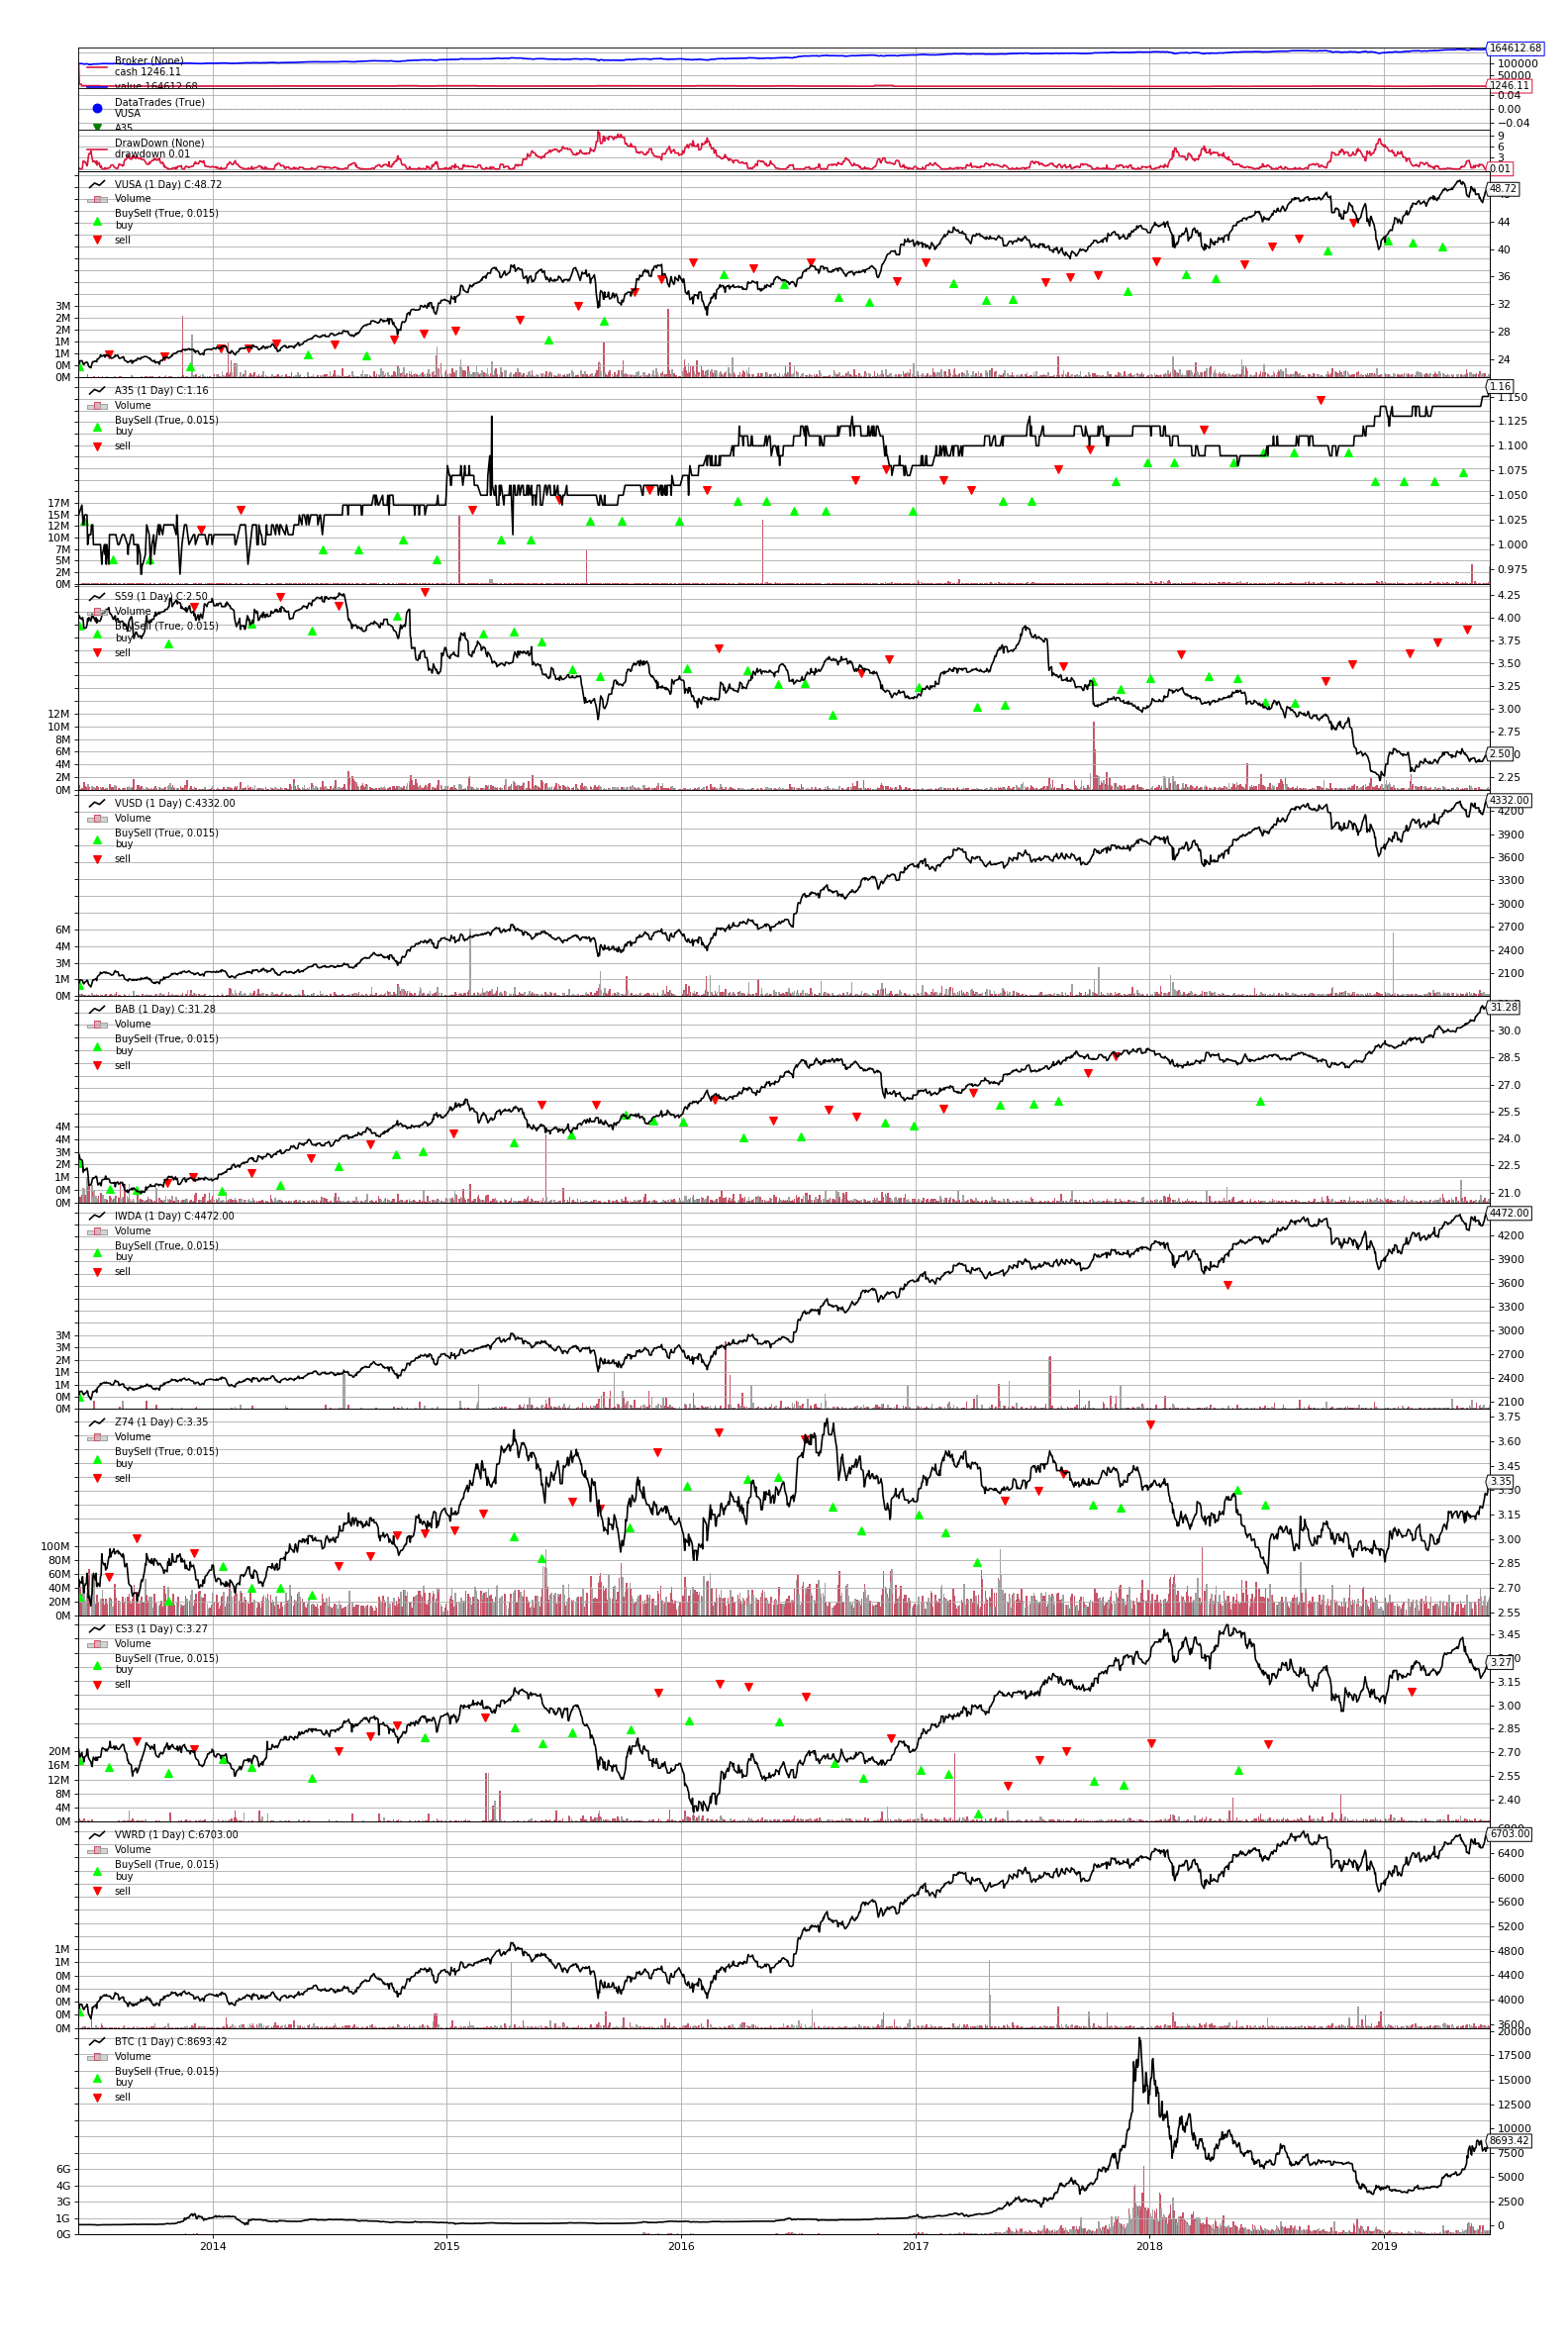

[[<Figure size 1440x2160 with 23 Axes>]]

<IPython.core.display.Javascript object>

In [32]:
# plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = 20, 30

bokehPlotter = Bokeh(style="bar", plot_mode="tabs")
cerebro.plot()